In [1]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing


In [3]:
#Leemos los datos y hacemos la estandarización con standard scaler
df = pd.read_csv("regLinPoli2.txt")

X_train, X_test, Y_train, Y_test = train_test_split(df.drop('y', axis=1), df[['y']], train_size=0.75, test_size=0.25)
X_train, X_test, Y_train, Y_test = np.array(X_train), np.array(X_test), np.array(Y_train), np.array(Y_test)
scalerX = preprocessing.StandardScaler().fit(X_train)
X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)
scalerY = preprocessing.StandardScaler().fit(Y_train)
Y_train = scalerY.transform(Y_train)
Y_test = scalerY.transform(Y_test)

In [7]:
#función de entrenamiento
def out(w,X):
    return X.dot(w[1:]) +w[0]

def train(X, y, w, la, eta = 0.01):
    for i in range(len(X)):
        err = y[i] - out(w, X[i])
        w[0] = w[0] + eta * (err)
        w[1:] = w[1:] + eta * (err*X[i]) - la * w[1:]
    return w

In [14]:
#Función del error cuadrático medio
def ECM(X, Y, w):
    return np.mean((X.dot(w[1:])+ w[0] - Y)**2)

In [11]:
#Función para hacer el muestreo de los subconjuntos
def sub(X, k):
    I = np.random.choice(len(X), len(X), False)
    return [I[i] % k for i in range(len(X))]

In [12]:
#Generamos la función que hace la validación cruzada
def crossvalidate(X_train, Y_train, w, k, la):
    S = np.array(sub(X_train, k))
    err = []
    for j in range(k):
        X_tr, Y_tr, X_tst, Y_tst = X_train[S != j], Y_train[S != j], X_train[S == j], Y_train[S == j]
        w = train(X_tr, Y_tr, w, la)
        err = np.append(err, ECM(X_tst, Y_tst.flatten(), w))
    err_prom = np.mean(err)
    return w, err_prom

In [21]:
#Probamos la función con los datos
la = np.linspace(0.0, 1.0, 100)
err_prom = []
for i in range(len(la)):
    w = np.asarray([rnd.random() for j in range(len(X_train[0]) + 1)])
    w, err = crossvalidate(X_train, Y_train, w, 10, la[i])
    err_prom = np.append(err_prom, err)

In [22]:
err_prom

array([ 0.62352727,  0.68854595,  0.76691961,  0.79430774,  0.81932745,
        0.84323049,  0.86155898,  0.87304987,  0.88185773,  0.89929591,
        0.92043185,  0.91730946,  0.93255417,  0.94186561,  0.93961887,
        0.94593712,  0.94668908,  0.95353013,  0.95700139,  0.95579167,
        0.96304433,  0.95552404,  0.96082647,  0.95516336,  0.9718986 ,
        0.9756414 ,  0.96887421,  0.96907428,  0.97616818,  0.976967  ,
        0.98363475,  0.99056024,  0.98087057,  0.98235628,  0.9973279 ,
        0.98921509,  0.99200549,  0.99049699,  0.99023562,  0.99275084,
        0.99123217,  0.99180761,  0.99273591,  0.99116323,  0.99538699,
        0.99744534,  0.99799681,  0.99891066,  1.0015915 ,  1.00242727,
        1.00143918,  1.00024997,  1.00343596,  1.00171964,  1.00459998,
        1.00852569,  1.00875882,  1.00694669,  1.00594761,  1.00494368,
        1.00882585,  1.00988265,  1.00426831,  1.01708198,  1.00866076,
        1.0062238 ,  1.00770228,  1.01170402,  1.01092018,  1.01

0.0 0.623527265579


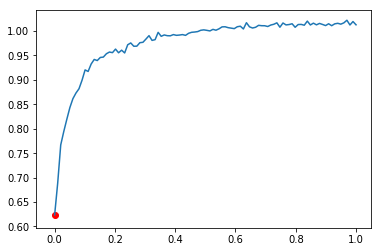

In [23]:
err_min = np.amin(err_prom)
la_min = np.argmin(err_prom)
print la[la_min], err_min

plt.plot(la, err_prom)
plt.scatter(la[la_min], err_min, c='r')
plt.show()

In [26]:
#Usamos la lambda óptima para entrenar
w = np.asarray([rnd.random() for i in range(len(X_train[0]) + 1)])
for i in range(len(X_train)):
    w = train(X_train, Y_train, w, la[la_min])

    
print ECM(X_train, Y_train.flatten(), w)
print ECM(X_test, Y_test.flatten(), w)

0.569506017202
0.561363555439
